# Week5 - Lab

* Assign X, y
* Train-test split
* Visualize & speculate on training dataset
* Train a logistic regression model
* Evaluate the model, roc score
* Explain findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()

In [2]:
df

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow
...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000,Orange
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow


 #### Assign X, y

In [3]:
X = df.drop('Gender',axis=1) # here we are assuming X as all the columns except 'Gender' so we are dropping Gender column.
y = df['Gender'] # here we are taking only Gender column in y.

#### Train-test split

In [4]:
from sklearn.model_selection import train_test_split

def generate_splits():
    y = df['Gender']
    X = df[[x for x in df.columns if x != 'Gender']]

    return train_test_split(X, y, test_size=0.2)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 104
Test examples: 27


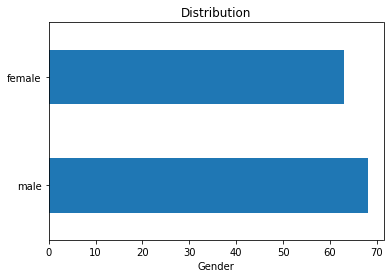

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

df['Gender'].value_counts().plot.barh()
plt.title('Distribution')
plt.xlabel('Gender')
plt.show()

In [6]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


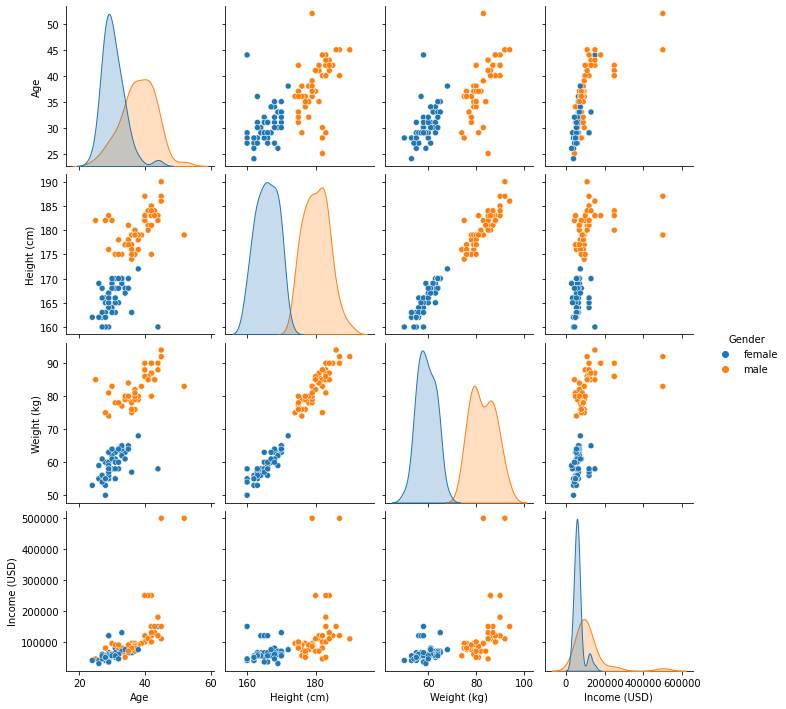

In [8]:
sns.pairplot(data=X_train.join(y_train), hue='Gender');

In [9]:
numerical_var  = ['Age', 'Height (cm)', 'Weight (kg)','Income (USD)']
categorical_var = ['Occupation','Education Level', 'Marital Status','Favorite Color']

### Train a logistic regression model

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

def generate_estimates():
    numerical_var  = ['Age', 'Height (cm)', 'Weight (kg)','Income (USD)']
    ohes = ['Occupation','Education Level','Marital Status','Favorite Color']

    poly_pipeline = Pipeline([
        ('add_polynomials', PolynomialFeatures(2, include_bias=False)),
        ('standardize_poly', StandardScaler())]
    )

    processing_pipeline = ColumnTransformer(transformers=[
        ('poly_processing', poly_pipeline, numerical_var),
        ('dummys', OneHotEncoder(handle_unknown = 'ignore'), ohes)])

    modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty=None))])

    return modeling_pipeline.fit(X_train, y_train)
m = generate_estimates()
y_hat = m.predict(X_test)
    
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

      female       1.00      1.00      1.00        12
        male       1.00      1.00      1.00        15

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



### Evaluate the model, roc score

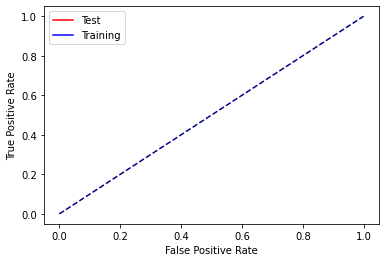

In [22]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=m):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label='Yes')
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
print ('training: ', roc_auc_score(y_train, generate_probs(X_train)))
print ('testing: ', roc_auc_score(y_test, generate_probs(X_test)))

training:  1.0
testing:  1.0


### Explain findings

* A model with an F1 score of 1.0 has perfect accuracy and recall, accurately identifying all true positives and without producing any false positives or false negatives. A model's accuracy is evaluated using the F1 score, which considers both precision and recall.

* The model is completely able to distinguish between positive and negative samples if the ROC score for both training and testing is 1.0, and there is no overlap between the two distributions. It means that the model is perfectly discriminating between + and - values.
